<a href="https://colab.research.google.com/github/AliTavakoli2001/Deep-Learning-Project/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Add the necessary Frameworks and Libraries**





In [1]:
import tensorflow as TF
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist
import numpy as NP
import matplotlib.pyplot as plt

---
# **Load Mnist Data**


> **Why unlabeled data?**

In an autoencoder, we only need unlabeled data because it is an unsupervised learning model. The goal of an autoencoder is to learn the underlying patterns of the data and reconstruct the input data without requiring any labels. It focuses on minimizing the reconstruction error rather than predicting labels.







In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step




---


# **Normalize data to range [0,1]**


> **Normalizing Image Data for Better Model Performance**

The two lines of code normalize the image data by converting pixel values from the range [0, 255] to [0, 1]. This is done by first converting the data type to float32 and then dividing by 255. This normalization helps improve model performance and training stability by ensuring the input features are on a similar scale.



In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


---

# Flatten images

The `reshape` function converts each 2D image into a 1D vectorby flattening the pixel values row-wise. This transformation is necessary because fully connected neural networks expect 1D input vectors instead of 2D matrices.

In [4]:
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))



---


# Define Autoencoder model


1. The input layer `Input(shape=(784,))` takes a **flattened 28×28 image** as a **1D vector** with **784 values**.  
2. The **encoder layer** `Dense(32, activation='relu')` reduces the input **from 784 to 32 dimensions**, extracting key features.  
3. The **decoder layer** `Dense(784, activation='sigmoid')` reconstructs the original **784-dimensional** image from the **compressed 32-dimensional** representation.  
4. **ReLU** helps retain important features in encoding, while **sigmoid** ensures output values remain between **0 and 1**, matching the normalized pixel range.  

In [5]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)



---

# model summary

This will show the architecture and the number of parameters

In [6]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)



---


# Compile model

This line compiles the autoencoder using the **Adam optimizer** for efficient and adaptive learning and **binary cross-entropy loss**, which is suitable for pixel values (0 to 1) and helps minimize reconstruction error.

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



---


# Train the autoencoder
This line trains the autoencoder model for 50 epochs using the training data (x_train) as both input and target. It processes data in batches of 256, shuffling the data before each epoch. The validation data (x_test) is used to track performance during training. The training history, including loss and accuracy, is saved in the history variable.

In [8]:
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3859 - val_loss: 0.1907
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1817 - val_loss: 0.1555
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1510 - val_loss: 0.1349
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1327 - val_loss: 0.1218
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1204 - val_loss: 0.1135
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1128 - val_loss: 0.1074
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1070 - val_loss: 0.1029
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1030 - val_loss: 0.0996
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1000 - val_loss: 0.0971
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0977 - val_loss: 0.0955
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0966 - val_loss: 0.0945
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 



---


# Visualizing the results

This function displays images from the **original test data** and the **reconstructed images** generated by the autoencoder model in a two-row plot. The first row shows the original images, and the second row shows the reconstructed images from the model. This helps you evaluate the model's performance in terms of image reconstruction.

In [9]:
def plot_results(x_test, decoded_imgs, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        if i == 0:
            plt.text(-2, -2, "Test Images", fontsize=14, ha='center')

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        if i == 0:
            plt.text(-2, -2, "Decoded Images", fontsize=14, ha='center')

    plt.show()



---


# Encode and decode some test images

This line of code uses the `autoencoder` model to make **predictions** on the input test data (`x_test`). It generates **reconstructed images** that should closely resemble the original test images, though with some potential minor loss or distortion. The reconstructed images are stored in the `decoded_imgs` variable.

In [10]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step




---


# Plot the results

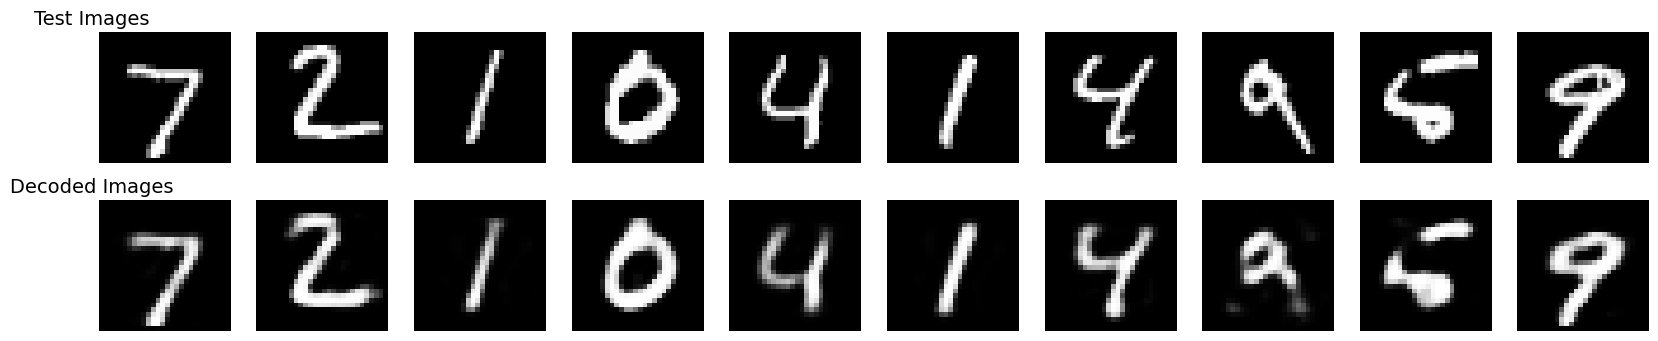

In [11]:
plot_results(x_test, decoded_imgs)




---


# Plot training & validation accuracy

This code plots the model's loss over training and validation datasets throughout the epochs. It visualizes the loss on the training data (`Train`) and the validation data (`Test`) over the course of training, with labeled axes for epochs and loss. The chart helps track the model's performance and improvement during training.

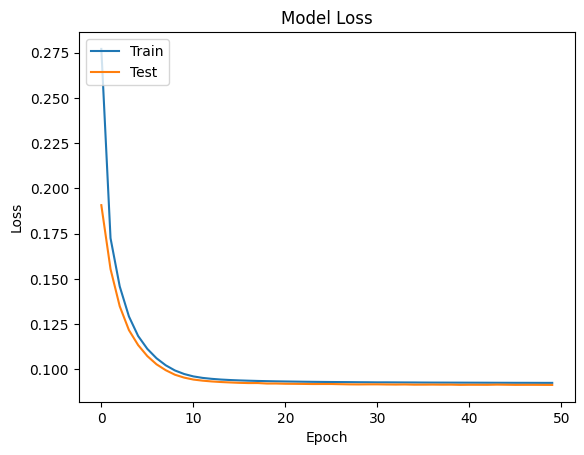

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()